# Clase 3 - Multiclasificación
![picture](https://drive.google.com/uc?id=1Ar6KpqlsLxcLlnOrXPx6QZejStP6bV9P)

## Pre requisitos

Se actualiza fastai descargando y ejecutando el script *colab*

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Dar permiso para acceder a mi Drive

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

Nos aseguramos que cualquier cambio en una librería es recargado automáticamente y que que cualquier gráfica o imagen se muestre aquí

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Clase 3 - Multiclasificación

Importamos el módulo de vision de la librería fastai

In [0]:
from fastai.vision import *

### Preparación para la API de Kaggle

Los datos no están en la página de [datasets de fastai](https://course.fast.ai/datasets) por temas de copyright, por lo que hya que bajárselos de de Kaggle. De modo que usaremos la [API de Kaggle](https://github.com/Kaggle/kaggle-api) que será util si se quiere competir en alguna competición de Kaggle.

Primero hay que instalar la API

In [0]:
! {sys.executable} -m pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


A continuación hay que copiar las credenciales de Kaggle, para eso hay que ir a la página de [Kaggle](https://www.kaggle.com/) pinchar en la imagen de nuestro perfil y seleccionar *My Account*

![kaggle1](https://github.com/maximofn/Curso-Fastai/blob/master/Imagenes/Kaggle01.PNG?raw=true)

Bajar hasta donde pone *Create New API Token* y pulsar el botón

![kaggle2](https://github.com/maximofn/Curso-Fastai/blob/master/Imagenes/Kaggle02.PNG?raw=true)

Esto nos dará un archivo llamado `kaggle.json`, lo guardamos y lo subimos a nuestro drive

Creamos una carpeta para este json

In [0]:
!mkdir -p ~/.kaggle/

Creamos una variable con el directorio de drive dónde lo tenemos guardado

In [0]:
drive_folder = '/content/drive/My\ Drive/Colab\ Notebooks/Curso\ fastai/03\ Multiclasificacion'

Lo copiamos

In [0]:
!cp {drive_folder}/kaggle.json ~/.kaggle/

### Descarga de los datos

Vamos a dercargar los datos de la competición [planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space).

**Importante** Primero hay que aceptar las reglas de la competición, si no nos dejará descargar los datos. Para ello ir al apartado *Rules* de la competición y aceptarlas

![kaggle3](https://github.com/maximofn/Curso-Fastai/blob/master/Imagenes/Kaggle03.PNG?raw=true)

Creamos una carpeta para los datos

In [0]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

Descargamos los datos

#### Opción 1

Los descargamos a través de la API de Kaggle

Primero damos permisos de lectura y escritura

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Vemos los datos disponibles en la competición

In [0]:
!kaggle competitions files planet-understanding-the-amazon-from-space

name                                                size  creationDate         
-------------------------------------------------  -----  -------------------  
sample_submission_v2.csv/sample_submission_v2.csv    3MB  2019-12-15 22:14:13  
train_v2.csv/train_v2.csv                            1MB  2019-12-15 22:14:13  
test_v2_file_mapping.csv/test_v2_file_mapping.csv  600KB  2019-12-15 22:14:13  
Kaggle-planet-test-tif.torrent                       2MB  2019-12-15 22:14:13  
Kaggle-planet-train-tif.torrent                      1MB  2019-12-15 22:14:13  


Descargamos los datos

In [0]:
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  

404 - Not Found
404 - Not Found


#### Opción 2

Si la celda anterior no descarga los datos, hacerlo a mano, para ello ir al apartado *Data* de la competición

![kaggle4](https://github.com/maximofn/Curso-Fastai/blob/master/Imagenes/Kaggle04.PNG?raw=true)

Seleccionar ```train-jpg.tar``` y dar al botón de download de más abajo

![kaggle5](https://github.com/maximofn/Curso-Fastai/blob/master/Imagenes/Kaggle05.PNG?raw=true)

Lo mismo hacemos con ```train_v2.csv```

![kaggle6](https://github.com/maximofn/Curso-Fastai/blob/master/Imagenes/Kaggle06.PNG?raw=true)

Subimos los archivos a nuestro drive y los copiamos a la máquina de Google

In [0]:
!cp {drive_folder}/train-jpg.7z /content/data/planet/
!cp {drive_folder}/train_v2.csv /content/data/planet/

Descomprimimos el archivo archivo con las fotos

In [0]:
!7za -bd -y x /content/data/planet/train-jpg.7z
!mv /content/train-jpg/ /content/data/planet/


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
1 file, 628678542 bytes (600 MiB)

Extracting archive: /content/data/planet/train-jpg.7z
--
Path = /content/data/planet/train-jpg.7z
Type = 7z
Physical Size = 628678542
Headers Size = 265942
Method = LZMA2:24
Solid = +
Blocks = 1

Everything is Ok

Folders: 1
Files: 40479
Size:       634676188
Compressed: 628678542


In [0]:
!ls /content/data/planet/train-jpg

train_0.jpg	 train_19109.jpg  train_28217.jpg  train_37325.jpg
train_10000.jpg  train_1910.jpg   train_28218.jpg  train_37326.jpg
train_10001.jpg  train_19110.jpg  train_28219.jpg  train_37327.jpg
train_10002.jpg  train_19111.jpg  train_2821.jpg   train_37328.jpg
train_10003.jpg  train_19112.jpg  train_28220.jpg  train_37329.jpg
train_10004.jpg  train_19113.jpg  train_28221.jpg  train_3732.jpg
train_10005.jpg  train_19114.jpg  train_28222.jpg  train_37330.jpg
train_10006.jpg  train_19115.jpg  train_28223.jpg  train_37331.jpg
train_10007.jpg  train_19116.jpg  train_28224.jpg  train_37332.jpg
train_10008.jpg  train_19117.jpg  train_28225.jpg  train_37333.jpg
train_10009.jpg  train_19118.jpg  train_28226.jpg  train_37334.jpg
train_1000.jpg	 train_19119.jpg  train_28227.jpg  train_37335.jpg
train_10010.jpg  train_1911.jpg   train_28228.jpg  train_37336.jpg
train_10011.jpg  train_19120.jpg  train_28229.jpg  train_37337.jpg
train_10012.jpg  train_19121.jpg  train_2822.jpg   train_37338.jpg
t

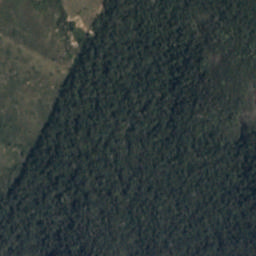

In [0]:
img = open_image('/content/data/planet/train-jpg/train_10047.jpg')
img

### Preparación de los datos

Ahora no tenemos una etiqueta para cada imagen, sino que cada imagen puede tener varias etiquetas, veamos esto en el CSV

In [0]:
import pandas as pd

# Se cargan los datos del CSV en un dataframe
df = pd.read_csv(path/'train_v2.csv')

# Ver las primeras filas del CSV
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


Al tener varias etiquetas por imagen no podemos usar la función ```ImageDataBunch```, necesitamos más flexibles, por lo que tendremos que crear el ```DataBunch``` de otra manera

#### Transformaciones

Primero definimos las transformaciones que vamos a hacer en las imágenes, si vemos la información de ```get_transforms```

In [0]:
doc(get_transforms)

Como vemos la función ```get_transforms``` no tiene habilito la vuelta de las imágenes de manera vertical. Esto es lógico, ya que normalmente se usa el reconocimiento de imágenes de tipo clasificador de perros, por lo que normalmente le entrarán imágenes de perros de pie, no al revés. Por lo que no tiene sentido aplicar la transformación de dar la vuelta a la imagen verticalmente.

Pero en el caso de imágenes satélitales esto da igual

Por otro lado se configura ```max_wrap=0.```. En otro tipo de aplicaciones (clasificador de perros) las imágenes pueden tener distintas orientaciones, por lo que tiene sentido esta transformación.

Pero en imágenes satelitales no se va a dar esto, las imágenes van a estar siempre tomadas desde arriba

In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

Ya podemos crear nuestro ```DataBunch```

#### ```DataBunch```

Para crear el ```DataBunch``` lo hacemos es dos partes. Se hace esto para poder entrenar la red mejor, más adelante se verá por qué

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

Una vez creado el dataset vemos las imágenes. Podemos ver que las imágenes tienen varias etiquetas

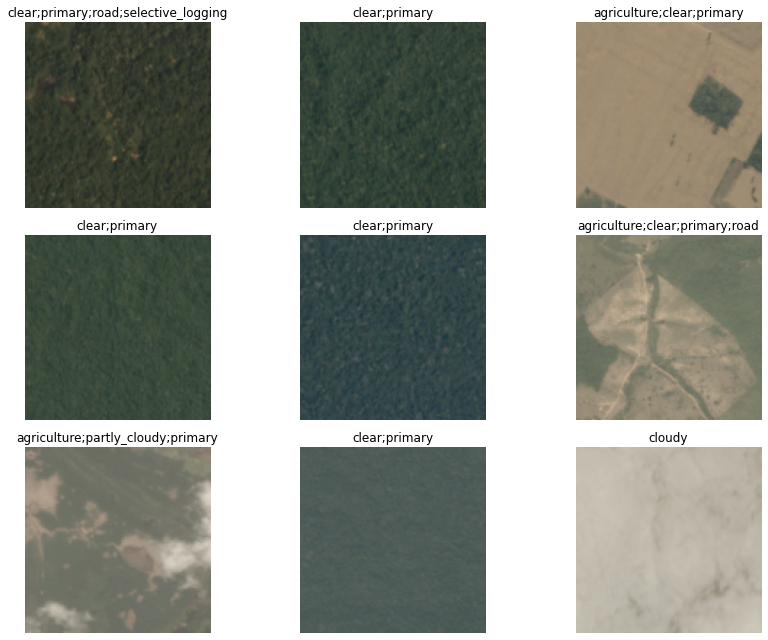

In [0]:
data.show_batch(rows=3, figsize=(12,9))

Para crear el `Learner`se hace lo mismo que hasta ahora. Solo que ahora elegiremos una arquitectura de ResNet-50 y en cuanto a las métricas usaremos al `accuracy`y el `F2 score`.

El `F2 score`se elige porque es el que pide Kaggle en su competición. Para saber más de esta métrica consultar [F1 score](https://en.wikipedia.org/wiki/F1_score).

In [0]:
arch = models.resnet50

In [0]:
help(partial)

Help on class partial in module functools:

class partial(builtins.object)
 |  partial(func, *args, **keywords) - new function with partial application
 |  of the given arguments and keywords.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __reduce__(...)
 |      helper for pickle
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __setattr__(self, name, value, /)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(...)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |  
 |  args
 |      tuple of arguments to future partial c

In [0]:
doc(accuracy_thresh)

In [0]:
doc(fbeta)

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


We use the LR Finder to pick a good learning rate.

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


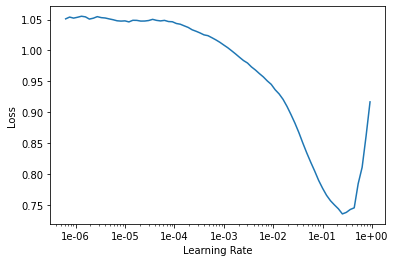

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 0.01

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.135734,0.114618,0.942484,0.901960,02:58
1,0.115966,0.099929,0.943894,0.914475,02:58
2,0.105036,0.092917,0.955971,0.918112,02:59
3,0.094917,0.088124,0.954838,0.923829,02:59
4,0.094602,0.087038,0.957119,0.925653,03:02


In [0]:
learn.save('stage-1-rn50')

Descongelamos y seguimos entrenando

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


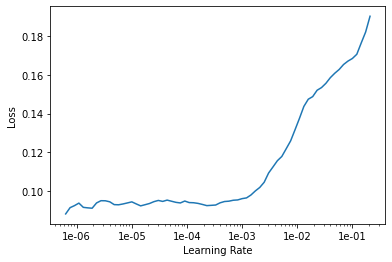

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.095048,0.092304,0.953784,0.918586,03:11
1,0.098698,0.089796,0.952462,0.919704,03:13
2,0.088452,0.087014,0.957090,0.925968,03:11
3,0.086496,0.083183,0.959234,0.928194,03:13
4,0.083809,0.082432,0.958384,0.929139,03:14


In [0]:
learn.save('stage-2-rn50')

In [0]:
img.shape

torch.Size([3, 256, 256])

Volvemos a entrenar. Solo que ahora con imágenes de tamaño 256, antes lo hicimos con imágenes de tamaño 128.
Esto se hizo para entrenar más rápido. Pero ahora se entrena con imágenes de tamaño 256 para hacer un ajuste más fino de los pesos de la red
Por eso antes creamos el `DataBunch` en dos sentencias, para ahora poder reutilizar la primera

Además reducimos el batch size para no tener un error de memoria en la GPU

In [0]:
doc(src.databunch)

In [0]:
bs=16

In [0]:
data = (src.transform(tfms, size=256)
        .databunch(bs=bs).normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


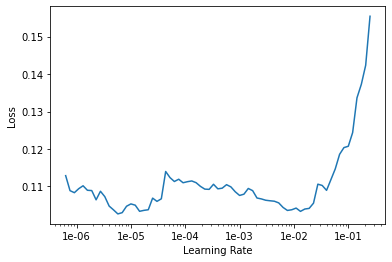

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-2/2

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.102488,0.091947,0.957250,0.921815,07:36
1,0.099954,0.089413,0.959415,0.922150,07:35
2,0.096571,0.088235,0.960592,0.924630,07:36
3,0.096320,0.085012,0.959074,0.926658,07:35
4,0.091200,0.084965,0.961711,0.926822,07:36


In [0]:
learn.save('stage-1-256-rn50')

Descongelamos y seguimos entrenando

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.099841,0.089487,0.956618,0.924665,09:53
1,0.109937,0.090714,0.954111,0.922274,09:52
2,0.091974,0.088169,0.960680,0.924888,09:52
3,0.084344,0.084092,0.959161,0.926206,09:53
4,0.082160,0.084460,0.960578,0.927792,09:53


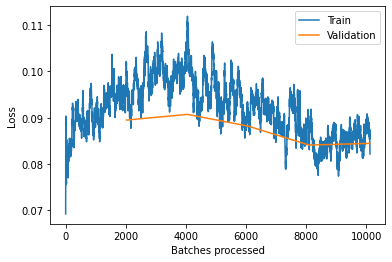

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

Mirando en la sección `Laderboard` de la competición podemos ver en qué posición podríamos haber quedado.

In [0]:
learn.export()